# Ledningens halvårsrapport H1 2024
### Rekommendationer  
För att motverka den minskade försäljningen i mars föreslås att genomföra en marknadsföringskampanj.  
En djupare analys av de kategorier som driver störst intäkt respektive minst intäkt kan visa på åtgärder för förbättringar.

### Slutsatser

**Vad säljer**  
Electronics och Sports driver intäkterna och står för den största delen av försäljningen.  
Medan Beauty och Toys har minst intäkter och mindre spridning vilket indikerar en stagnerad marknad.  
Topp-3-kategorier är Electronics, Sports och Clothing.

**Hur ser en typisk order ut**  
Genomsnittlig orderstorlek (AOV) ligger på 1401, med en spridning på 1167.

**Var säljer vi**  
Intäkterna är störst i Stockholm, följt av Göteborg och Uppsala.  
Skillnaderna mellan städerna är små, vilket indikerar en jämn marknadstäckning.

**När säljer vi**  
Intäkterna varierar något över året, med en tydlig dipp i mars och återhämtning i april–maj, vilket indikerar att det finns en säsongseffekt.

**Avvikelseanalys**  
Avvikelser analyserades både statistiskt (±2 standardavvikelser från medel) och visuellt med boxplot-diagram.  
Det ger en balanserad bild där både ovanliga totaler och extremvärden i fördelningen kan upptäckas.  
  
Störst spridning per kategori är i Electronics och Sports. Flera extremvärden i dessa kategorier indikerar  
att de lockar kunder med större köpkraft och att kategorierna kan innehålla premiumprodukter.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import src.io_utils as io
from src.ecommerce import EcommerceAnalyzer 
import src.metrics as M
import src.viz as V  

In [2]:
df = io.df
df_clean = EcommerceAnalyzer(df).clean_df()
df_clean_month = EcommerceAnalyzer(df_clean).add_month()

In [3]:
print(f"Total intäkt: {M.total_revenue(df_clean)}")
print(f"Antal sålda enheter: {M.total_units(df_clean)}")

Total intäkt: 3502767
Antal sålda enheter: 7463


In [16]:
print("Intäkt per kategori") 
M.revenue_per_category(df_clean)

Intäkt per kategori


,category,total_intäkt
0,Beauty,163054.0
1,Clothing,586745.0
2,Electronics,1364228.0
3,Home,511071.0
4,Sports,734653.0
5,Toys,143016.0


In [17]:
print("Top 3 intäkt per kategori") 
M.top_categories(df_clean)

Top 3 intäkt per kategori


category
Electronics    1364228
Sports          734653
Clothing        586745
Name: revenue, dtype: int64

In [6]:
print(f"Average order value (AOV): {M.aov(df_clean):.0f} \nAOV standardavvikelse: {M.aov_varians(df_clean):.0f}")

Average order value (AOV): 1401 
AOV standardavvikelse: 1167


In [7]:
print("Total intäkt per stad") 
M.revenue_per_city(df_clean)

Total intäkt per stad


,city,total_intäkt
0,Göteborg,859019.65
1,Malmö,567926.32
2,Stockholm,1227201.94
3,Uppsala,551478.42
4,Västerås,297140.90


In [8]:
by_month = M.change_over_time(df_clean_month)
print("Total intäkt per månad") 
print (by_month)

Total intäkt per månad
       month    revenue
0 2024-01-01  664083.32
1 2024-02-01  548462.03
2 2024-03-01  487602.00
3 2024-04-01  580194.83
4 2024-05-01  632165.16
5 2024-06-01  590259.89


In [9]:
revenue_outliers, high_revenue_categories, high_revenue_cities = M.summarize_outliers(df_clean)
print("Rader med ovanlig revenue:")
display(revenue_outliers.head())

print("Kategorier med ovanlig intäkt:")
if high_revenue_categories.empty:
    print ("Inga kategorier med ovanlig intäkt")
else:
    print(high_revenue_categories)
    
print("\nStäder med ovanlig intäkt:") 
if high_revenue_cities.empty:
    print ("Inga städer med ovanlig intäkt")
else:
    print(high_revenue_cities)

Rader med ovanlig revenue:


,order_id,date,city,category,price,units,revenue
45,100045,2024-06-17,Västerås,Sports,1052.08,6,6312.48
53,100053,2024-05-18,Stockholm,Electronics,1033.02,4,4132.08
57,100057,2024-06-04,Malmö,Electronics,1393.58,3,4180.74
68,100068,2024-02-13,Göteborg,Electronics,1003.34,5,5016.70
72,100072,2024-02-26,Stockholm,Electronics,968.62,6,5811.72


Kategorier med ovanlig intäkt:
Inga kategorier med ovanlig intäkt

Städer med ovanlig intäkt:
Inga städer med ovanlig intäkt


In [10]:
print("Intäkt per kategori och stad")
M.pivot_revenue_by_category_and_city(df_clean).round(0).astype(int)

Intäkt per kategori och stad


city,Göteborg,Malmö,Stockholm,Uppsala,Västerås,All
category,,,,,,
All,859020,567926,1227202,551478,297141,3502767
Electronics,340629,234715,457852,236363,94669,1364228
Sports,173114,123529,292131,92308,53571,734653
Clothing,128566,77555,206056,102400,72168,586745
Home,137852,89276,166672,71514,45756,511071
Beauty,42693,22152,50002,27956,20251,163054
Toys,36165,20699,54489,20938,10725,143016


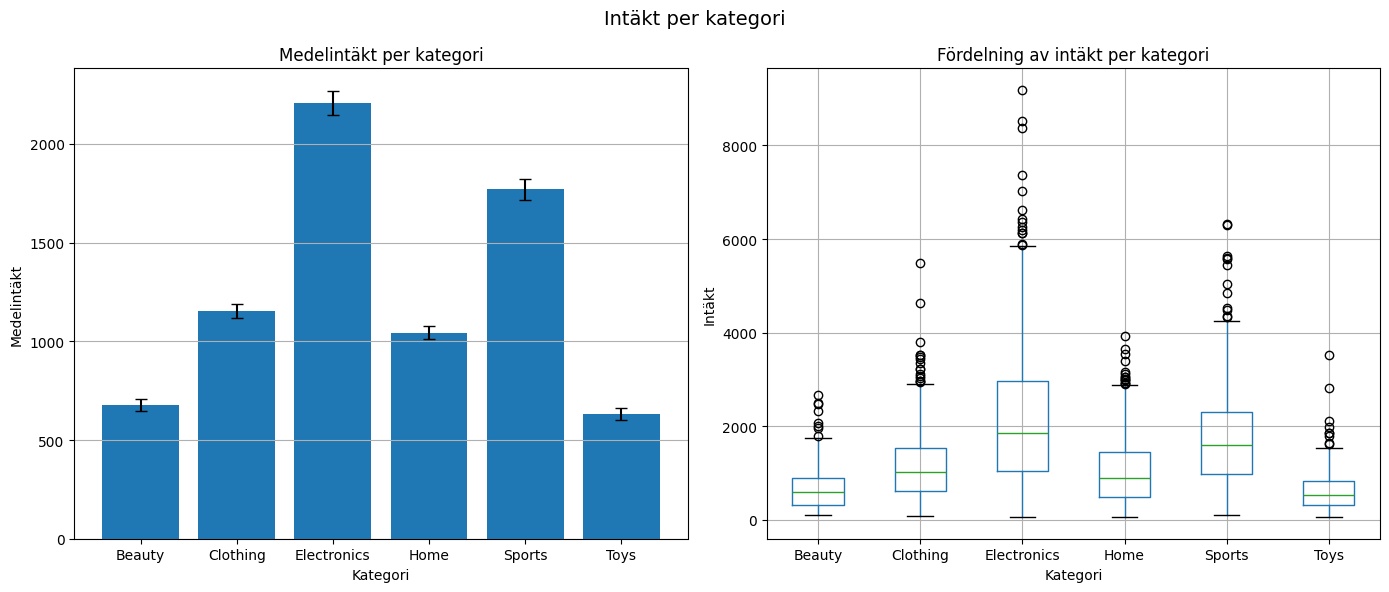

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
V.bar_top_categories(df_clean, ax=axes[0])
V.boxplot_revenue_by_category(df_clean, ax=axes[1])
fig.suptitle("Intäkt per kategori", fontsize =14)
plt.tight_layout()
plt.show()

### Intäkt per kategori 
- **Medelintäkt per kategori** visar att intäkten är störst inom elektronik och att leksaker har den minsta intäkten.
- I **Fördelning av intäkt per kategori** ser vi några outliers dessa har ingen större betydelse då vi kan se att felet i **Medelintäkt per kategori** är minimalt. 

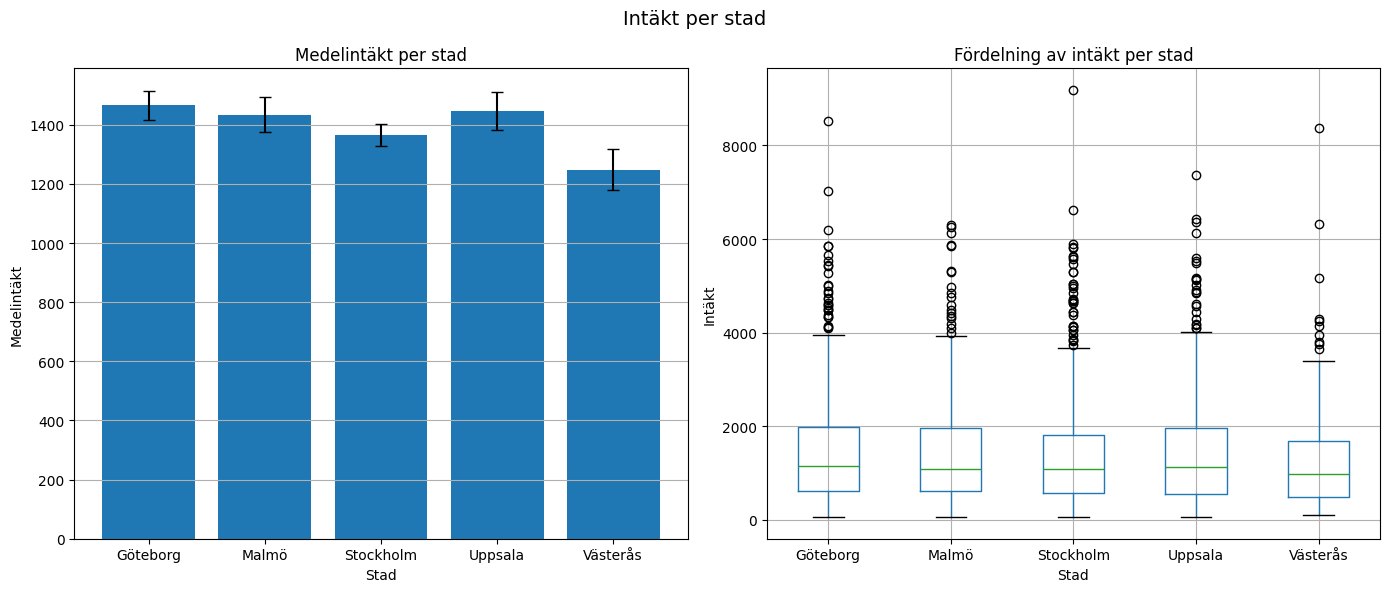

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
V.revenue_by_city(df_clean, ax=axes[0])
V.boxplot_revenue_by_city(df_clean, ax=axes[1])
fig.suptitle("Intäkt per stad", fontsize =14)
plt.tight_layout()
plt.show()

### Intäkt per stad
- **Medelintäkt per stad** visar att medelintäkten inte skiljer sig åt mellan städerna. 
- I **Fördelning av intäkt per stad** ser vi några outliers dessa har ingen större betydelse då vi kan se att felet i **Medelintäkt per stad** är minimalt. 

<Axes: title={'center': 'Intäkt per månad'}, xlabel='Månad', ylabel='Intäkt'>

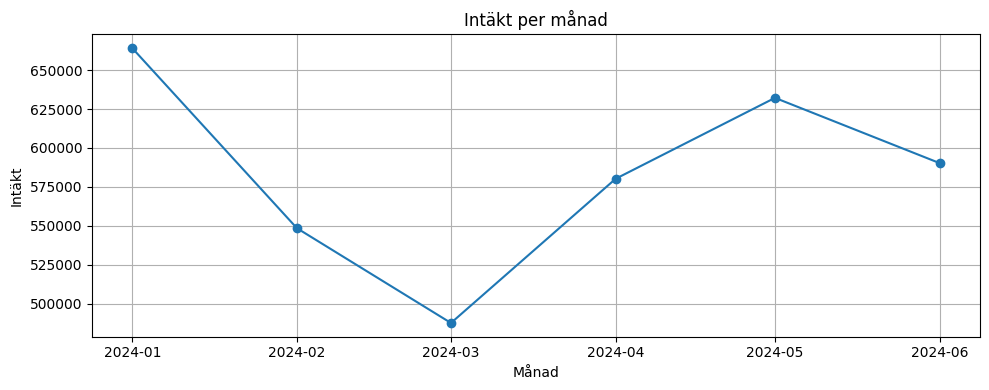

In [13]:
fig, ax = plt.subplots(figsize=(10, 4))
V.line(ax, by_month["month"], by_month["revenue"], "Intäkt per månad", "Månad", "Intäkt", grid= True)

### Intäkt per månad
- Diagrammet visar att intäkten varierar mellan månaderna.
- Intäkten är störst i januari och minst i mars.